In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import h5py

def nrnMread(fileName):
    f = open(fileName, "rb")
    nparam = struct.unpack('i', f.read(4))[0]
    typeFlg = struct.unpack('i', f.read(4))[0]
    return np.fromfile(f,np.double)

objectives_file = h5py.File('../objectives/multi_stim_bbp_full_allen_gpu_tune_18_stims.hdf5', 'r')
opt_weight_list = objectives_file['opt_weight_list'][:]
opt_stim_name_list = objectives_file['opt_stim_name_list'][:]
opt_stim_list = [e.decode('ascii') for e in opt_stim_name_list]



volts = nrnMread("../Data/VHotP0.dat")
myPlot = plt.plot(volts, label="NeuroGPU")
target_volts_path = './target_volts/allen_data_target_volts_10000.hdf5'
target_volts_hdf5 = h5py.File(target_volts_path, 'r')
target_volts = [target_volts_hdf5[s][:] for s in opt_stim_list][6]
plt.plot(target_volts, color="Red", label="target")
plt.legend()


FileNotFoundError: [Errno 2] No such file or directory: '../Data/VHotP0.dat'

In [2]:
myPlot

NameError: name 'myPlot' is not defined

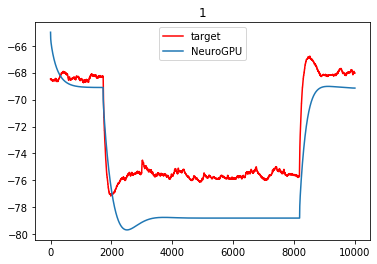

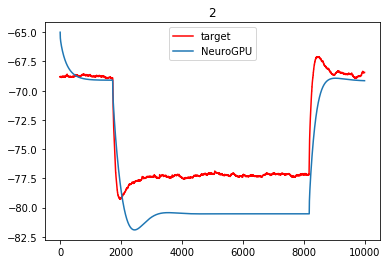

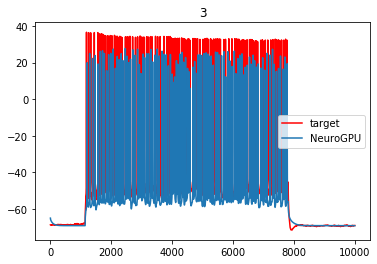

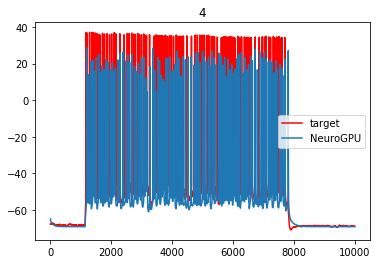

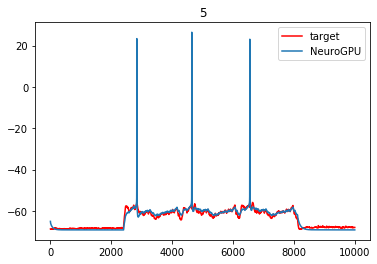

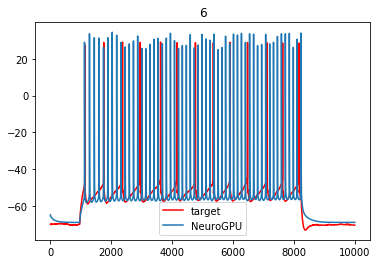

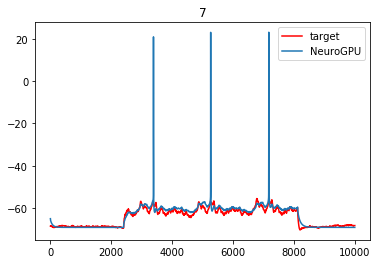

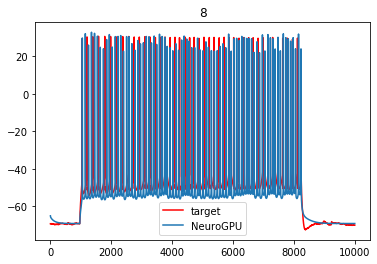

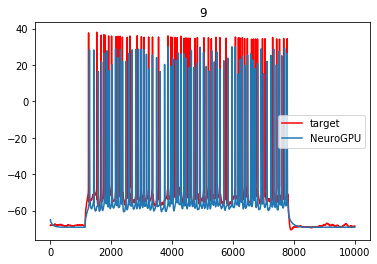

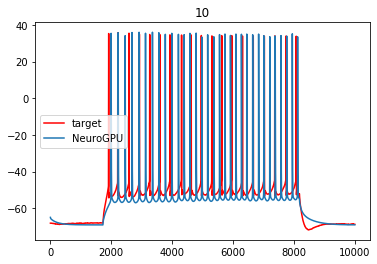

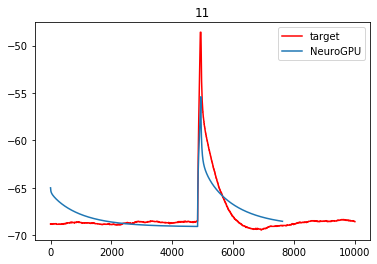

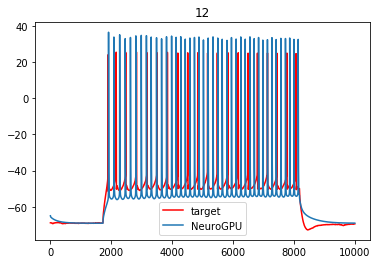

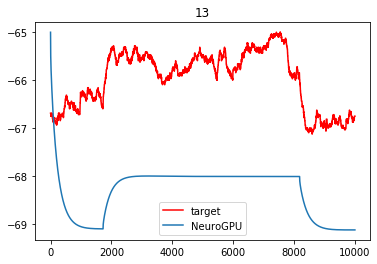

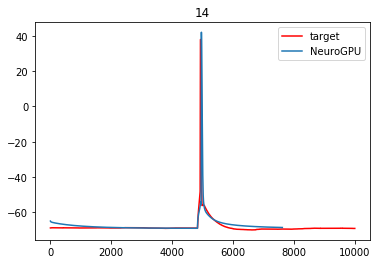

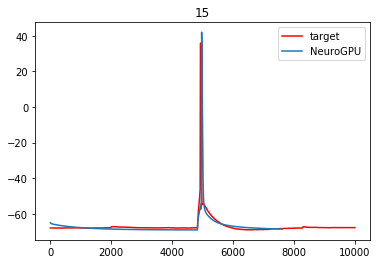

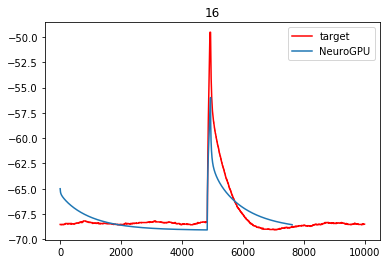

In [6]:
for i in range(1,17):
    plt.figure()
    plt.title(str(i))
    volts = nrnMread("../Data/VHotP{}.dat".format(i))[:10000]
    target_volts_path = './target_volts/allen_data_target_volts_10000.hdf5'
    target_volts_hdf5 = h5py.File(target_volts_path, 'r')
    target_volts = [target_volts_hdf5[s][:] for s in opt_stim_list][i]
    plt.plot(target_volts, color="Red", label="target")
    myPlot = plt.plot(volts, label="NeuroGPU")

    plt.legend()